In [92]:
import pandas as p
import matplotlib.pyplot as plt

df = p.read_csv("data/electricityConsumptionAndProductioction.csv")
df = df.set_index("DateTime")
df.index = p.to_datetime(df.index)

#n = 730
n = 1500
for col in df.columns:
    df[f'{col}_rolling_avg'] = df[col].rolling(n, min_periods=1).mean()

df.head(20)


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Consumption_rolling_avg,Production_rolling_avg,Nuclear_rolling_avg,Wind_rolling_avg,Hydroelectric_rolling_avg,Oil and Gas_rolling_avg,Coal_rolling_avg,Solar_rolling_avg,Biomass_rolling_avg
DateTime,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,6352.000000,6527.000000,1395.000000,79.000000,1383.000000,1896.000000,1744.000000,0.000000,30.000000
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,6234.000000,6114.000000,1394.000000,87.500000,1247.500000,1662.500000,1692.500000,0.000000,30.000000
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,6113.666667,5968.000000,1393.666667,105.666667,1175.000000,1596.666667,1667.000000,0.000000,30.000000
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,6005.750000,5876.750000,1394.500000,127.000000,1124.250000,1561.250000,1639.750000,0.000000,30.000000
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,5916.000000,5792.200000,1394.200000,133.400000,1091.400000,1539.800000,1603.400000,0.000000,30.000000
2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30,5850.833333,5724.333333,1394.333333,126.333333,1069.166667,1525.666667,1578.833333,0.000000,30.000000
2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31,5802.571429,5670.714286,1394.000000,122.285714,1050.428571,1515.000000,1559.000000,0.000000,30.142857
2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34,5767.750000,5655.250000,1393.750000,118.625000,1067.500000,1506.375000,1538.375000,0.000000,30.625000
2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34,5739.111111,5634.777778,1393.444444,111.111111,1096.111111,1489.777778,1512.222222,0.888889,31.000000


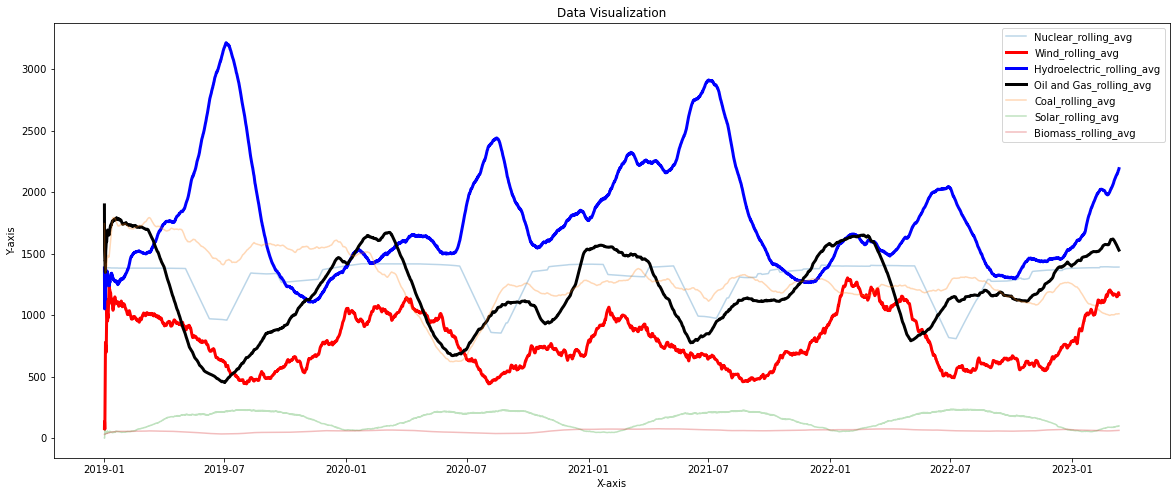

In [89]:
df.head(20)
plt.figure(figsize=(20, 8))

# scalar_nuclear = 0.5
# scalar_wind = 2
# scalar_solar = 4

scalar_nuclear = 1
scalar_wind = 1
scalar_solar = 1


plt.plot(df['Nuclear_rolling_avg'] * scalar_nuclear, label="Nuclear_rolling_avg", alpha = 0.3)
plt.plot(df['Wind_rolling_avg'] * scalar_wind, label="Wind_rolling_avg", alpha = 1, color = "red", linewidth = "3")
plt.plot(df['Hydroelectric_rolling_avg'], label="Hydroelectric_rolling_avg", alpha = 1, color = "blue", linewidth = "3")
plt.plot(df['Oil and Gas_rolling_avg'], label="Oil and Gas_rolling_avg", alpha = 1, color = "black", linewidth = "3")
plt.plot(df['Coal_rolling_avg'], label="Coal_rolling_avg", alpha = 0.3)
plt.plot(df['Solar_rolling_avg'] * scalar_solar, label="Solar_rolling_avg", alpha = 0.3)
plt.plot(df['Biomass_rolling_avg'], label="Biomass_rolling_avg", alpha = 0.3)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

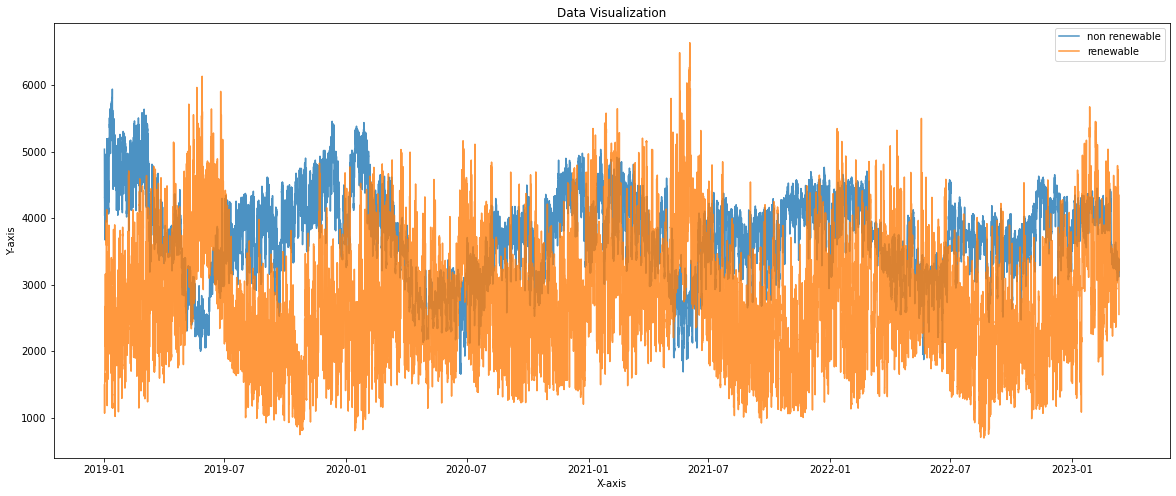

In [68]:
plt.figure(figsize=(20, 8))

#df['non_renewable_sources'] = df['Nuclear_rolling_avg'] + df['Oil and Gas_rolling_avg']  + df['Coal_rolling_avg']
#df['renewable_sources'] = df['Wind_rolling_avg'] + df['Hydroelectric_rolling_avg'] + df['Solar_rolling_avg'] + df['Biomass_rolling_avg']

df['non_renewable_sources'] = df['Nuclear'] + df['Oil and Gas']  + df['Coal']
df['renewable_sources'] = df['Wind'] + df['Hydroelectric'] + df['Solar'] + df['Biomass']

plt.plot(df['non_renewable_sources'], alpha = 0.8, label = "non renewable")
plt.plot(df['renewable_sources'], alpha = 0.8, label = "renewable")

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

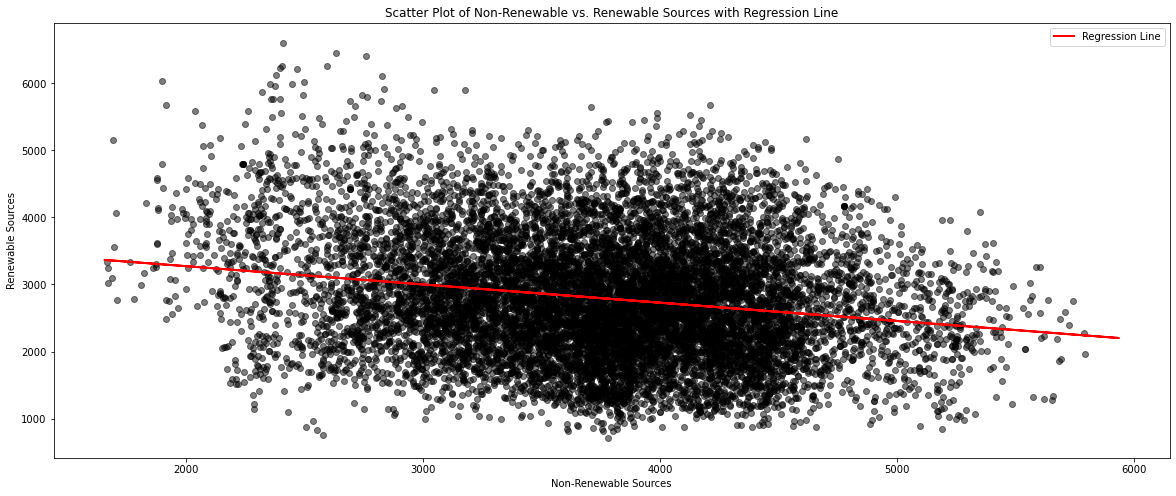

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df['non_renewable_sources'] and df['renewable_sources'] are your data points
x = df['non_renewable_sources'].values.reshape(-1, 1)
y = df['renewable_sources'].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict the y-values based on the regression model
y_pred = model.predict(x)

# Create a scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(df['non_renewable_sources'][::3], df['renewable_sources'][::3], alpha=0.5, color='BLACK')

# Plot the regression line
plt.plot(x, y_pred, color='RED', linewidth=2, label="Regression Line")

plt.xlabel('Non-Renewable Sources')
plt.ylabel('Renewable Sources')
plt.title('Scatter Plot of Non-Renewable vs. Renewable Sources with Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


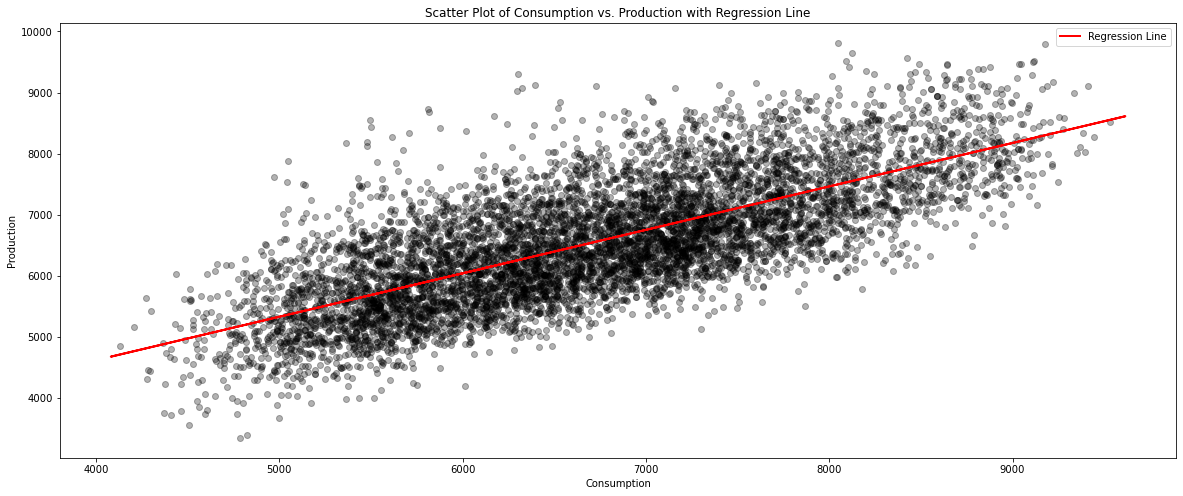

In [66]:


# Assuming df['Consumption_rolling_avg'] and df['Production_rolling_avg'] are your data points
x = df['Consumption'].values.reshape(-1, 1)
y = df['Production'].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict the y-values based on the regression model
y_pred = model.predict(x)

# Create a scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(df['Consumption'][::5], df['Production'][::5], alpha=0.3, color='black')

# Plot the regression line
plt.plot(x, y_pred, color='red', linewidth=2, label="Regression Line")

# Set consistent labels
plt.xlabel('Consumption')
plt.ylabel('Production')
plt.title('Scatter Plot of Consumption vs. Production with Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()
